In [1]:
from sklearn import datasets
import numpy.linalg as lin
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist
from keras import models
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

# MNIST 기초

- inverve를 통한 mnist 학습
- 신경망을 통한 mnist 학습
- CNN 통한 mnist 학습
- fashion mnist, face db 테스트
- web 연동 (한글, 스케치 인식)

## 데이터 준비

In [2]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


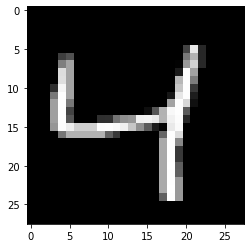

In [5]:
print(X_train.shape)
plt.imshow(X_train[2], cmap = 'gray')

(10000, 28, 28)


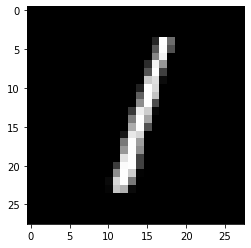

In [6]:
print(X_test.shape)
plt.imshow(X_test[2], cmap = 'gray')

In [9]:
print(X_test[2])
print(y_train.shape)
print(y_train)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38 254
  109   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  87 252
   82   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 135 241
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  45 244 150
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  8

In [24]:
X_train = X_train.reshape((X_train.shape[0],784))
X_test = X_test.reshape((X_test.shape[0],784))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [25]:
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

## 1. 역행렬을 이용한 MNIST 학습

   y = Wx + b

1. y = W * [x 1] -> [x 1] * W
    - A -> 60000x785(784+1) 행렬
    - 1은 y = Wx + b에서 상수 b
    - Y -> 60000x10 행렬
2. W = inv(A) * Y  
   - W -> 785x10 행렬
3. predict = [x 1] * W
    - x = 1x784
    - W = 785x10

In [26]:
A = np.hstack((X_train, np.ones((60000,1))))
print(A.shape)

(60000, 785)


In [27]:
%%time

W=np.matmul(lin.pinv(A), y_train_e)
print(W.shape)
print(W)
print(W[:,0].shape)

(785, 10)
[[ 7.44778176e-17  3.08116485e-17  6.24517735e-17 ... -1.88247216e-17
  -9.68761668e-17  2.74183832e-17]
 [-2.02652642e-15 -8.88043361e-15 -1.23469953e-14 ...  9.01778765e-15
   1.44453949e-14  4.97795720e-15]
 [ 3.89572462e-15  8.31633536e-15  8.79628286e-15 ... -6.90318037e-15
  -1.11422250e-14 -2.33884532e-15]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.57799659e-01  2.41326501e-01  4.98284745e-02 ...  1.41540555e-01
  -1.23002061e-01  4.55121243e-02]]
(785,)
Wall time: 9.03 s


(10000, 10)
(10000,)
[7 2 1 ... 4 5 6]


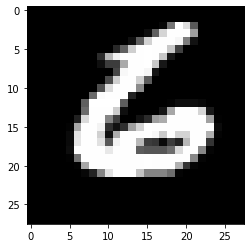

In [32]:
# test 데이터로 예측
T = np.hstack((X_test, np.ones((10000,1))))
p_ =np.matmul(T, W)
print(p_.shape)

p = np.argmax(p_,axis=1)
print(p.shape)
print(p)

plt.imshow(X_test[9999,:].reshape(28,28), cmap='gray')

In [29]:
# 인식률
np.mean(p==y_test)

0.8603

In [21]:
a = np.array([[1,2,3],
              [7,8,9],
              [4,5,6]])
print(np.argmax(a)) # 가장 큰값을 갖는 곳의 인덱스 
print(np.argmax(a, axis=1)) # 각 행에서 가장 큰 값을 갖는 곳 인덱스 
print(np.argmax(a, axis=0)) # 각 열에서 가장 큰 값을 갖는 곳 인덱스 

5
[2 2 2]
[1 1 1]


## 2. 신경망을 통한 MNIST 학습

In [33]:
model = Sequential()
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

In [34]:
hist = model.fit(x = X_train, y = y_train_e,
                epochs = 10,
                verbose = 1,
                batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.7959 - accuracy: 0.8396
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.9115 - accuracy: 0.8809
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6551 - accuracy: 0.8823
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6154 - accuracy: 0.8840
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2871 - accuracy: 0.8883
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3310 - accuracy: 0.8876
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3427 - accuracy: 0.8861
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2069 - accuracy: 0.8894
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3156 - accuracy: 0.8885
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.237

In [36]:
score = model.evaluate(X_test, y_test_e, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.534481048583984
Test accuracy: 0.8790000081062317


In [38]:
p = model.predict(X_test)
print(p.shape)

p = np.argmax(p, axis=1)
print(p.shape)
print(p)
print(np.mean(p==y_test))

(10000, 10)
(10000,)
[7 2 1 ... 9 5 6]
0.879


input size * 뉴런 수 + 뉴런수

In [39]:
model.summary()

# 784 차원 + 1 
# 분류기 = 785*10 = 7850

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [41]:
model = Sequential()
model.add(Dense(5, input_dim=784, activation='relu')) # layer1 = 784*5+5
model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])